In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np


In [14]:
image = io.imread('bird.png')

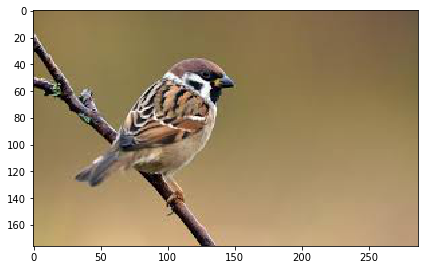

In [15]:
io.imshow(image);

In [16]:
image.shape

(176, 287, 3)

In [17]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)
print(image.shape)
print(image[:5])

(50512, 3)
[[138 115  71]
 [138 115  71]
 [138 115  71]
 [139 116  72]
 [139 116  72]]


In [18]:
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[161, 138,  95],
       [ 18,  10,   9],
       [187, 158, 117],
       [131, 110,  71],
       [208, 193, 182],
       [ 99,  90,  92],
       [174, 148, 107],
       [171, 158, 148],
       [147, 127,  81],
       [ 50,  38,  33],
       [137, 120, 111],
       [118,  95,  68],
       [139, 119,  74],
       [ 79,  65,  56],
       [237, 233, 228],
       [202, 170, 128]], dtype=uint8)

In [20]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(50512,)
(176, 287)


array([[12, 12, 12, ..., 11, 11, 11],
       [12, 12, 12, ..., 11, 11, 11],
       [12, 12, 12, ..., 11, 11, 11],
       ...,
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2]], dtype=uint8)

In [21]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('bird-compressed.png', newImage);

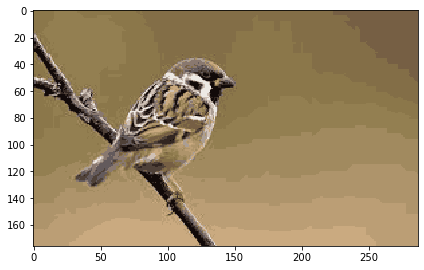

In [22]:
io.imshow(newImage);